In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets
import matplotlib.pyplot as plt
import numpy as np




In [2]:
img_size=64
transform = transforms.Compose(
    [transforms.Resize((img_size,img_size)),
        transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

'''datasets = {
    'train': torchvision.datasets.ImageFolder(
        root='dataset/train/',
        transform=transform
    ),
    'test': torchvision.datasets.ImageFolder(
        root='dataset/test/',
        transform=transform
    )
    
}
'''
training_set=torchvision.datasets.ImageFolder(root='dataset/train/',transform=transform)
test_set=torchvision.datasets.ImageFolder(root='dataset/test/',transform=transform)

In [3]:
training_set.class_to_idx

{'12518': 0,
 '12981': 1,
 '13866': 2,
 '14057': 3,
 '14167': 4,
 '14302': 5,
 '14498': 6,
 '14508': 7,
 '19513': 8,
 '24303': 9,
 '8443': 10,
 '8909': 11,
 '9000316': 12,
 '9000395': 13,
 '9617': 14}

In [4]:
test_set.class_to_idx

{'12518': 0,
 '12981': 1,
 '13866': 2,
 '14057': 3,
 '14167': 4,
 '14302': 5,
 '14498': 6,
 '14508': 7,
 '19513': 8,
 '24303': 9,
 '8443': 10,
 '8909': 11,
 '9000316': 12,
 '9000395': 13,
 '9617': 14}

In [5]:
training_loader = torch.utils.data.DataLoader(training_set, batch_size=4, shuffle=True, num_workers=2)
validation_loader = torch.utils.data.DataLoader(test_set, batch_size=4, shuffle=False, num_workers=2)

In [6]:
'''batch_size = 100
num_workers = 20
dataloaders = {
    'train': DataLoader(
        datasets['train'], 
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers
    ),
    'valid': DataLoader(
        datasets['valid'], 
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers
    )
}'''

"batch_size = 100\nnum_workers = 20\ndataloaders = {\n    'train': DataLoader(\n        datasets['train'], \n        batch_size=batch_size,\n        shuffle=True,\n        num_workers=num_workers\n    ),\n    'valid': DataLoader(\n        datasets['valid'], \n        batch_size=batch_size,\n        shuffle=True,\n        num_workers=num_workers\n    )\n}"

In [7]:
classes = ('couantro', 'grenadin', 'chocopie', 'iogyrt', 'frutonyny',
        'pervak', 'baikal', 'henessy', 'pepsi_1l', 'pepsi_0.5l','kalashnikov','morozenor_rozhok','kola_1l','kola_0.5','grecha')
# Report split sizes
print('Training set has {} instances'.format(len(training_set)))
print('Validation set has {} instances'.format(len(test_set)))

Training set has 8100 instances
Validation set has 900 instances


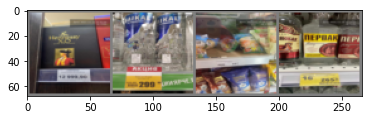

henessy baikal morozenor_rozhok pervak


In [31]:
import matplotlib.pyplot as plt
import numpy as np

# функция для показа изображения
def imshow(img):
    img = img / 2 + 0.5     # денормализуем
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# получаем несколько случайных тренировочных изображений
dataiter = iter(training_loader)
images, labels = dataiter.next()

# показываем изображения
imshow(torchvision.utils.make_grid(images))
# печатаем метки
print(' '.join(classes[labels[j]] for j in range(4)))

pervak  frutonyny  kalashnikov  henessy


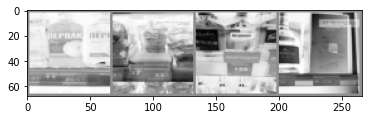

In [9]:
'''def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

dataiter = iter(training_loader)
images, labels = dataiter.next()

# Create a grid from the images and show them
img_grid = torchvision.utils.make_grid(images)
matplotlib_imshow(img_grid, one_channel=True)
print('  '.join(classes[labels[j]] for j in range(4)))
'''

In [10]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 13 * 13, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 15)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        #print(x.shape)
        x = x.view((-1, 16*13*13))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [20]:
for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(training_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        #print(labels," ", outputs.shape)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 0.940
[2,  2000] loss: 0.942
[3,  2000] loss: 0.938
[4,  2000] loss: 0.939
[5,  2000] loss: 0.940
[6,  2000] loss: 0.940
[7,  2000] loss: 0.940
[8,  2000] loss: 0.939
[9,  2000] loss: 0.942
[10,  2000] loss: 0.941
[11,  2000] loss: 0.942
[12,  2000] loss: 0.940
[13,  2000] loss: 0.942
[14,  2000] loss: 0.941


KeyboardInterrupt: 

In [21]:
PATH = './my_net.pth'
torch.save(net.state_dict(), PATH)

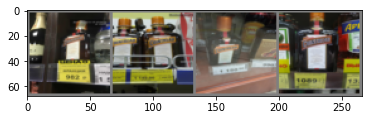

GroundTruth:  couantro couantro couantro couantro


In [32]:
dataiter = iter(validation_loader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [23]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [26]:
outputs = net(images)

In [27]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:  henessy couantro pervak couantro


In [28]:
correct = 0
total = 0
with torch.no_grad():
    for data in validation_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 63 %


In [33]:
class_correct = list(0. for i in range(15))
class_total = list(0. for i in range(15))
with torch.no_grad():
    for data in validation_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(15):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of couantro : 73 %
Accuracy of grenadin : 83 %
Accuracy of chocopie : 30 %
Accuracy of iogyrt : 93 %
Accuracy of frutonyny : 63 %
Accuracy of pervak : 78 %
Accuracy of baikal : 86 %
Accuracy of henessy : 68 %
Accuracy of pepsi_1l : 13 %
Accuracy of pepsi_0.5l : 73 %
Accuracy of kalashnikov : 78 %
Accuracy of morozenor_rozhok : 55 %
Accuracy of kola_1l : 58 %
Accuracy of kola_0.5 : 38 %
Accuracy of grecha : 60 %


In [30]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu


In [ ]:
net.to(device)

In [ ]:
inputs, labels = data[0].to(device), data[1].to(device)